In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA

import seaborn as sns

from mlxtend.plotting import plot_decision_regions

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

%matplotlib inline

Datasource: https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

In [2]:
wine = pd.read_csv("../data/wine.csv", header=None)
wine.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
166,3,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695
84,2,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520
120,2,11.45,2.40,2.42,20.0,96,2.90,2.79,0.32,1.83,3.25,0.80,3.39,625
16,1,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280
44,1,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885
157,3,12.45,3.03,2.64,27.0,97,1.90,0.58,0.63,1.14,7.50,0.67,1.73,880
91,2,12.00,1.51,2.42,22.0,86,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420
80,2,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278
137,3,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.00,0.82,1.69,515


In [3]:
names = """Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,
Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,
Color intensity,Hue,OD280/OD315 of diluted wines,Proline""".replace("\n", "").split(",")

In [4]:
wine.columns = names

In [5]:
wine.sample(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
42,1,13.88,1.89,2.59,15.0,101,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095
113,2,11.41,0.74,2.50,21.0,88,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434
15,1,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310
135,3,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695
111,2,12.52,2.43,2.17,21.0,88,2.55,2.27,0.26,1.22,2.00,0.90,2.78,325
80,2,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278
99,2,12.29,3.17,2.21,18.0,88,2.85,2.99,0.45,2.81,2.30,1.42,2.83,406
118,2,12.77,3.43,1.98,16.0,80,1.63,1.25,0.43,0.83,3.40,0.70,2.12,372
11,1,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280
98,2,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660


In [6]:
X = wine.iloc[:, 1:]
y = wine["Class"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values)

In [8]:
forest = RandomForestClassifier(max_depth=5, random_state=100)
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.97777777777777775

In [9]:
pd.DataFrame({"importance": forest.feature_importances_, 
              "feature": X.columns}).sort_values("importance")

,feature,importance
7,Nonflavanoid phenols,0.002274
5,Total phenols,0.007168
10,Hue,0.009185
2,Ash,0.018604
4,Magnesium,0.021156
3,Alcalinity of ash,0.021244
8,Proanthocyanins,0.022379
1,Malic acid,0.023760
0,Alcohol,0.112519
9,Color intensity,0.116670


In [11]:
tree = DecisionTreeClassifier(max_depth=5, random_state=100)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.93333333333333335

In [12]:
pd.DataFrame({"importance": tree.feature_importances_,
              "feature": X.columns}).sort_values("importance")

,feature,importance
0,Alcohol,0.000000
1,Malic acid,0.000000
2,Ash,0.000000
4,Magnesium,0.000000
5,Total phenols,0.000000
7,Nonflavanoid phenols,0.000000
8,Proanthocyanins,0.000000
10,Hue,0.000000
11,OD280/OD315 of diluted wines,0.000000
3,Alcalinity of ash,0.022208


In [13]:
X_train.shape

(133, 13)

In [14]:
ss = StandardScaler()

In [48]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(ss.fit_transform(X_train))
X_test_pca = pca.transform(ss.transform(X_test))
X_pca = np.vstack([X_train_pca, X_test_pca])
y1 = np.concatenate([y_train, y_test])
X_train_pca.shape, X_test_pca.shape

((133, 13), (45, 13))

In [50]:
# Find importance
pca.explained_variance_ratio_ #adds up to 1

array([ 0.36608025,  0.18290933,  0.1143668 ,  0.07214876,  0.06933371,
        0.05000728,  0.04059899,  0.02580733,  0.02385042,  0.01868185,
        0.01662524,  0.01222056,  0.00736947])

In [51]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(ss.fit_transform(X_train))
X_test_pca = pca.transform(ss.transform(X_test))
X_pca = np.vstack([X_train_pca, X_test_pca])
y1 = np.concatenate([y_train, y_test])
X_train_pca.shape, X_test_pca.shape

((133, 2), (45, 2))

In [52]:
# Find importance
pca.explained_variance_ratio_

array([ 0.36608025,  0.18290933])

In [53]:
pca.explained_variance_

array([ 4.75904328,  2.3778213 ])

In [35]:
pca.components_

array([[ 0.11314956, -0.25692245, -0.01725054, -0.24817587,  0.13399992,
         0.3876281 ,  0.42023451, -0.29702233,  0.32809046, -0.10170167,
         0.31854108,  0.37465015,  0.25778018],
       [ 0.51942379,  0.14761099,  0.2358132 , -0.09004872,  0.27495985,
         0.04806852, -0.01333442,  0.04745707,  0.02821271,  0.55311347,
        -0.19904051, -0.19664107,  0.42347904]])

In [17]:
forest.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=100,
            verbose=0, warm_start=False)

In [18]:
forest.score(pca.transform(X_test), y_test)

0.40000000000000002

In [19]:
tree.fit(X_train_pca, y_train)
tree.score(X_test_pca, y_test)

0.9555555555555556

In [20]:
#X_pca = np.vstack([X_train_pca, pca.transform(X_test)])
#y1 = np.concatenate([y_train, y_test])
#plot_decision_regions(X_pca, y1, tree)

In [21]:
#plot_decision_regions(X_train_pca, y_train, tree)

In [22]:
lr = LogisticRegression(random_state=100)
lr.fit(X_train_pca, y_train)
lr.score(pca.transform(X_test), y_test)

0.40000000000000002

ValueError: X cannot have more than 2 feature columns

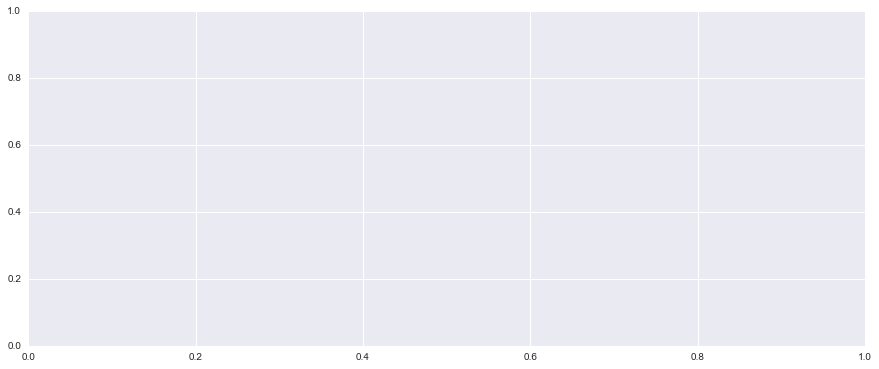

In [42]:
plt.figure(figsize=(15, 6))
plot_decision_regions(X_pca, y1, lr, res=0.1)

Training accuracy:  0.96992481203 Test Accuracy 0.977777777778


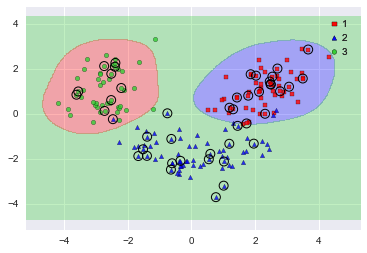

In [24]:
from sklearn.svm import SVC

svc = SVC(C=0.1, gamma=1, kernel="rbf", max_iter=10000, random_state=100, tol=1e-4)
svc.fit(X_train_pca, y_train)
plot_decision_regions(X_pca, y1, svc, X_highlight=X_test_pca)
print("Training accuracy: ", svc.score(X_train_pca, y_train),
      "Test Accuracy", svc.score(X_test_pca, y_test))

Training accuracy:  0.962406015038 Test Accuracy 0.977777777778


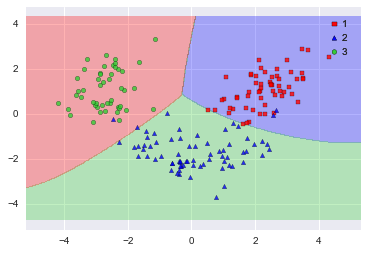

In [25]:
svc = SVC(C=0.1, gamma=0.1, kernel="rbf", max_iter=10000, random_state=100, tol=1e-4)
svc.fit(X_train_pca, y_train)
plot_decision_regions(X_pca, y1, svc)
print("Training accuracy: ", svc.score(X_train_pca, y_train),
      "Test Accuracy", svc.score(X_test_pca, y_test))